# Simulate transparency vs airmass at LSST
=======================================================================


- Sylvie Dagoret-Campagne
- affliliation : IJCLAB/IN2P3/CNRS
- creation date :  24 February 2020
- last update : October 22th 2023

=======================================================================


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
import numpy as np

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [4]:
matplotlib.rcParams.update({'font.size': 15, 'lines.linewidth': 2, 'lines.markersize': 15})
matplotlib.rcParams["axes.labelsize"]="small"
matplotlib.rcParams["axes.linewidth"]=2.0
matplotlib.rcParams["xtick.major.size"]=8
matplotlib.rcParams["ytick.major.size"]=8
matplotlib.rcParams["ytick.minor.size"]=5
matplotlib.rcParams["xtick.labelsize"]="large"
matplotlib.rcParams["ytick.labelsize"]="large"
matplotlib.rcParams["figure.figsize"]=(12,6)
matplotlib.rcParams['axes.titlesize'] = 15
matplotlib.rcParams['axes.titleweight'] = 'bold'
#matplotlib.rcParams['axes.facecolor'] = 'blue'
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
matplotlib.rcParams['lines.markersize'] = 10  # markersize, in points
matplotlib.rcParams['grid.alpha'] = 1. # transparency, between 0.0 and 1.0
matplotlib.rcParams['grid.linestyle'] = '-' # simple line
matplotlib.rcParams['grid.linewidth'] = 0.4 # in points 

In [5]:
from scipy.interpolate import interp1d

In [6]:
from libradtranpy import libsimulateVisible

In [7]:
os.getenv('LIBRADTRANDIR')

'/Users/dagoret/MacOSX/External/libRadtran'

In [8]:
AMMIN=1
AMMAX=3.1
AMSTEP = 0.1
all_am=np.arange(AMMIN,AMMAX,AMSTEP)
pressure = 0. # use default value
pwv=4.0
aer=0
ozone=300.
cloudext=0

In [9]:
NBOBS=len(all_am)

In [10]:
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBOBS)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange( NBOBS), alpha=1)

In [11]:
all_trans = []
for index in np.arange(NBOBS):
    am = all_am[index]
    print(f"simulate index = {index}, airmass = {am:.2f}")
    path,thefile=libsimulateVisible.ProcessSimulation(am,pwv,ozone,pressure,
                                                      prof_str='us',proc_str='sa',cloudext=cloudext,altitude_str="LSST")
    data = np.loadtxt(os.path.join(path,thefile))
    wl = data[:,0]
    atm = data[:,1] 
    all_trans.append(atm)

simulate index = 0, airmass = 1.00
simulate index = 1, airmass = 1.10
simulate index = 2, airmass = 1.20
simulate index = 3, airmass = 1.30
simulate index = 4, airmass = 1.40
simulate index = 5, airmass = 1.50
simulate index = 6, airmass = 1.60
simulate index = 7, airmass = 1.70
simulate index = 8, airmass = 1.80
simulate index = 9, airmass = 1.90
simulate index = 10, airmass = 2.00


******* WARNING >>>>>> 
 SETDIS--beam angle=computational angle;
 ******* changing cosine of solar zenith angle, umu0, from  0.500000 to 0.500055
******* WARNING >>>>>> 
 SETDIS--beam angle=computational angle;
 ******* changing cosine of solar zenith angle, umu0, from  0.500000 to 0.500055
******* WARNING >>>>>> 
 SETDIS--beam angle=computational angle;
 ******* changing cosine of solar zenith angle, umu0, from  0.500000 to 0.500055
******* WARNING >>>>>> 
 SETDIS--beam angle=computational angle;
 ******* changing cosine of solar zenith angle, umu0, from  0.500000 to 0.500055
******* WARNING >>>>>> 
 SETDIS--beam angle=computational angle;
 ******* changing cosine of solar zenith angle, umu0, from  0.500000 to 0.500055
******* WARNING >>>>>> 
 SETDIS--beam angle=computational angle;
 ******* changing cosine of solar zenith angle, umu0, from  0.500000 to 0.500055
******* WARNING >>>>>> 
 SETDIS--beam angle=computational angle;
 ******* changing cosine of solar zenith angle, umu0, from 

simulate index = 11, airmass = 2.10
simulate index = 12, airmass = 2.20
simulate index = 13, airmass = 2.30
simulate index = 14, airmass = 2.40
simulate index = 15, airmass = 2.50
simulate index = 16, airmass = 2.60
simulate index = 17, airmass = 2.70
simulate index = 18, airmass = 2.80
simulate index = 19, airmass = 2.90
simulate index = 20, airmass = 3.00


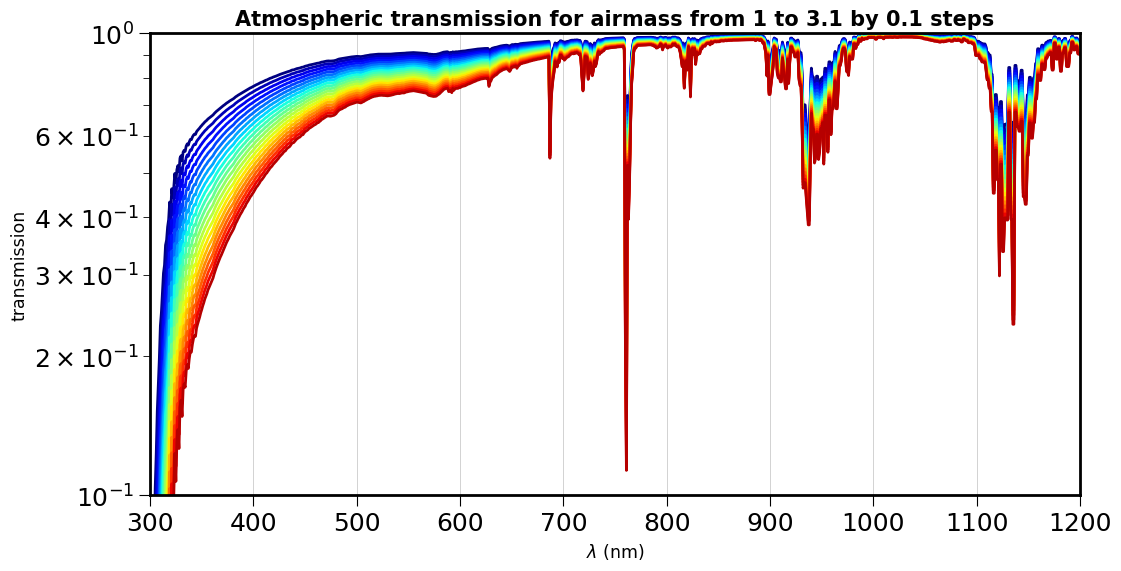

In [12]:
for index in np.arange(NBOBS):   
    plt.semilogy(wl,all_trans[index],'-',color=all_colors[index])
plt.xlim(300,1200)
plt.grid()
plt.title(f"Atmospheric transmission for airmass from {AMMIN} to {AMMAX} by {AMSTEP} steps")
plt.xlabel("$\\lambda$ (nm)")
plt.ylabel("transmission")
plt.ylim(0.1,1)
figname="multitransmission_log.png"
plt.savefig(figname)

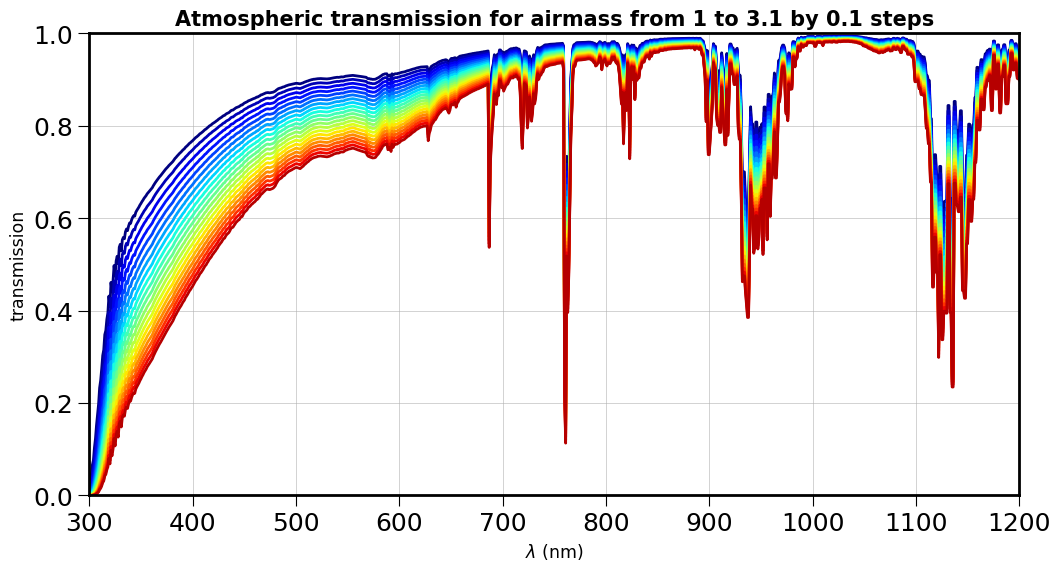

In [13]:
for index in np.arange(NBOBS):   
    plt.plot(wl,all_trans[index],'-',color=all_colors[index])
plt.xlim(300,1200)
plt.grid()
plt.title(f"Atmospheric transmission for airmass from {AMMIN} to {AMMAX} by {AMSTEP} steps")
plt.xlabel("$\\lambda$ (nm)")
plt.ylabel("transmission")
plt.ylim(0.0,1)
figname="multitransmission_lin.png"
plt.savefig(figname)